# ML Life Cycle: Evaluation and Deployment

In [2]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_curve


Goal:  

1. Build your DataFrame and define your ML problem:
    * Load the Airbnb "listings" data set
    * Define the label - what are you predicting?
    * Identify the features
2. Create labeled examples from the data set
3. Split the data into training and test data sets
4. Train, test and evaluate a logistic regression (LR) model using the scikit-learn default value for hyperparameter $C$
5. Perform a grid search to identify the optimal value of $C$ for a logistic regression model
6. Train, test and evaluate a logisitic regression model using the optimal value of $C$
7. Plot a precision-recall curve for both models
8. Plot the ROC and compute the AUC for both models
9. Perform feature selection
10. Make your model persistent for future use

## Part 1. Build Your DataFrame and Define Your ML Problem

#### Load a Data Set and Save it as a Pandas DataFrame

In [6]:
# Define the path to the file
folder_name = "data"
file_name = "airbnbData_train.csv"
file_path = os.path.join(os.getcwd(), folder_name, file_name)

# Load the data into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame to ensure it's loaded correctly
df.head()

,host_is_superhost,host_has_profile_pic,host_identity_verified,has_availability,instant_bookable,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,accommodates,...,n_host_verifications,neighbourhood_group_cleansed_Bronx,neighbourhood_group_cleansed_Brooklyn,neighbourhood_group_cleansed_Manhattan,neighbourhood_group_cleansed_Queens,neighbourhood_group_cleansed_Staten Island,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,False,True,True,True,False,-0.578829,-2.845589,-0.054298,-0.054298,-1.007673,...,1.888373,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,False,True,True,True,False,-4.685756,-0.430024,-0.112284,-0.112284,0.067470,...,0.409419,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,False,True,True,True,False,0.578052,-2.473964,-0.112284,-0.112284,0.605041,...,-1.069535,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,False,True,False,True,False,0.578052,1.010024,-0.112284,-0.112284,-0.470102,...,-0.576550,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,False,True,True,True,False,-0.054002,-0.066308,-0.112284,-0.112284,-1.007673,...,0.902404,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [7]:

y = df['host_is_superhost']

X = df.drop('host_is_superhost', axis = 1)

In [8]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=50)

In [9]:

model_default = LogisticRegression(max_iter=1000)

model_default.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [10]:
# 1. Make predictions on the test data using the predict_proba() method

proba_predictions_default = model_default.predict_proba(X_test)[:, 1] 
# 2. Make predictions on the test data using the predict() method

class_label_predictions_default = model_default.predict(X_test)

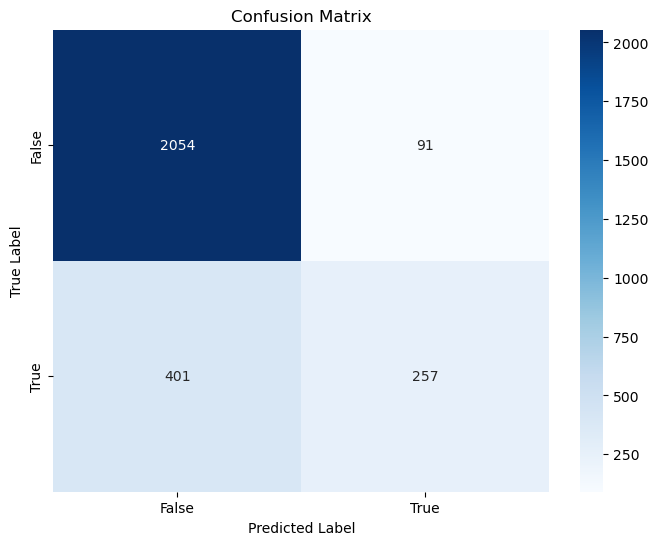

In [11]:

cm = confusion_matrix(y_test, class_label_predictions_default)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["False", "True"], yticklabels=["False", "True"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


In [12]:

cs = [10**i for i in range(-5, 5)]  # This creates a list of values from 10^-5 to 10^4
param_grid = {'C': cs}

param_grid


{'C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]}

In [13]:
print('Running Grid Search...')

# 1. Create a LogisticRegression model object with the argument max_iter=1000. 
#    Save the model object to the variable 'model'

model = LogisticRegression(max_iter=1000)

# 2. Run a grid search with 5-fold cross-validation and assign the output to the 
# object 'grid'.

grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')

# 3. Fit the model on the training data and assign the fitted model to the 
#    variable 'grid_search'

grid_search = grid.fit(X_train, y_train)

print('Done')

Running Grid Search...
Done


<b>Task</b>: Retrieve the value of the hyperparameter $C$ for which the best score was attained. Save the result to the variable `best_c`.

In [15]:

best_C = grid_search.best_params_['C']

best_C

10

## Part 6. Train, Test and Evaluate the Optimal Logistic Regression Model 

In [17]:

model_best = LogisticRegression(C=best_C, max_iter=1000)

model_best.fit(X_train, y_train)

LogisticRegression(C=10, max_iter=1000)

In [18]:
# 1. Make predictions on the test data using the predict_proba() method

proba_predictions_best = model_best.predict_proba(X_test)[:, 1]
# 2. Make predictions on the test data using the predict() method

class_label_predictions_best = model_best.predict(X_test)

print("Sample probabilities for 'True':", proba_predictions_best[:5])
print("Sample class labels:", class_label_predictions_best[:5])

Sample probabilities for 'True': [0.57702127 0.36164357 0.81264999 0.04957328 0.08377786]
Sample class labels: [ True False  True False False]


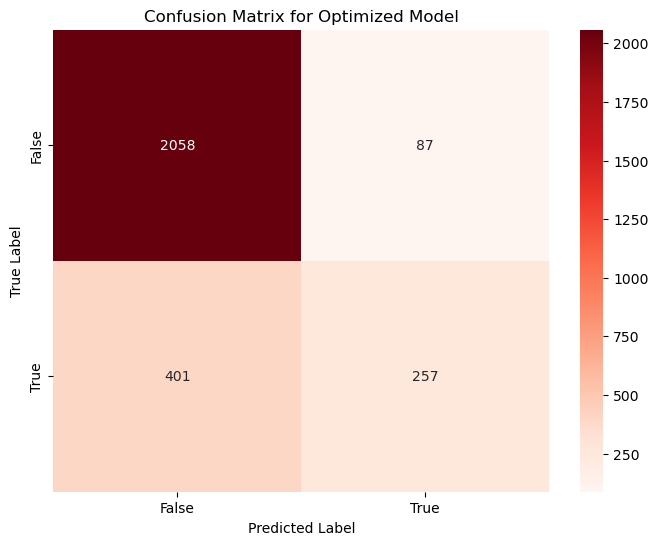

In [19]:

cm_best = confusion_matrix(y_test, class_label_predictions_best)

# Visualizing the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm_best, annot=True, fmt="d", cmap="Reds", xticklabels=["False", "True"], yticklabels=["False", "True"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Optimized Model")
plt.show()

## Part 7.  Plot Precision-Recall Curves for Both Models

In [21]:
precision_default, recall_default, thresholds_default = precision_recall_curve(y_test, proba_predictions_default)
precision_best, recall_best, thresholds_best = precision_recall_curve(y_test, proba_predictions_best)

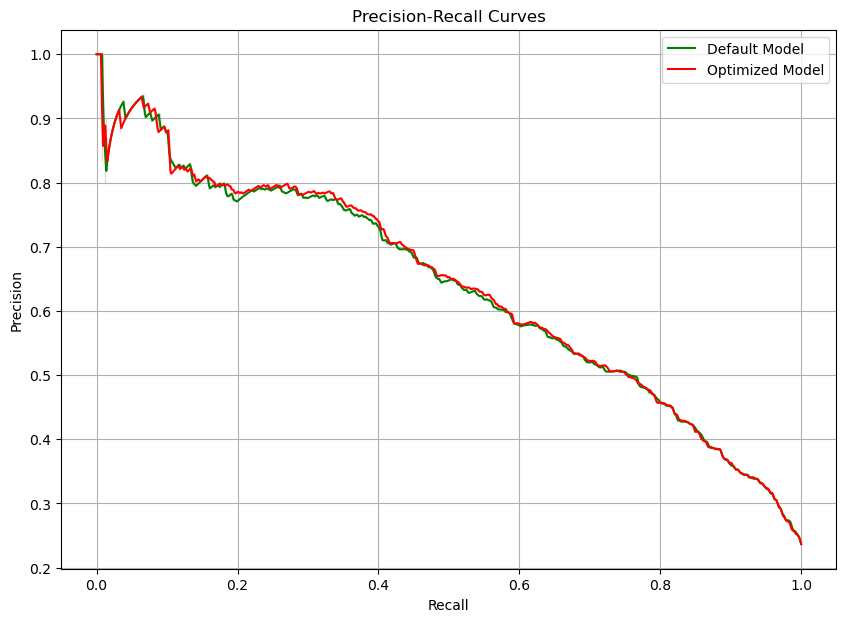

In [22]:

# Create a figure for plotting
plt.figure(figsize=(10, 7))

# Plotting the precision-recall curve for the default model in green
sns.lineplot(x=recall_default, y=precision_default, label='Default Model', color='green')

# Plotting the precision-recall curve for the best model in red
sns.lineplot(x=recall_best, y=precision_best, label='Optimized Model', color='red')

# Adding labels and title
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves')
plt.legend()
plt.grid(True)  # Add grid for better readability

# Show the plot
plt.show()

## Part 8. Plot ROC Curves and Compute the AUC for Both Models

In [24]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [25]:
fpr_default, tpr_default, thresholds_default = roc_curve(y_test, proba_predictions_default)
fpr_best, tpr_best, thresholds_best = roc_curve(y_test, proba_predictions_best)

auc_default = auc(fpr_default, tpr_default)
auc_best = auc(fpr_best, tpr_best)
print("AUC for the default model:", auc_default)
print("AUC for the optimized model:", auc_best)

AUC for the default model: 0.833646495348623
AUC for the optimized model: 0.8342685683111215


#### Plot ROC Curve for Default Hyperparameter:

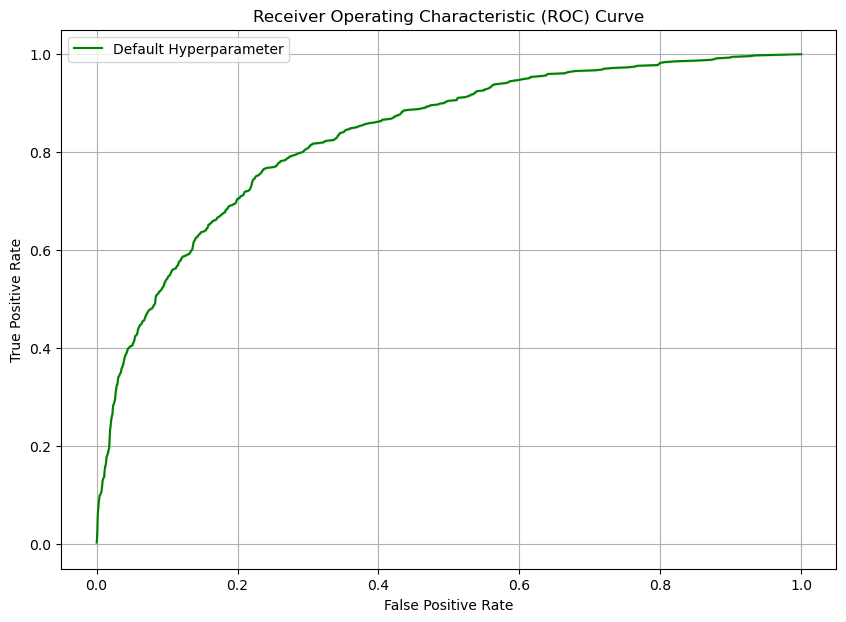

In [27]:

# Create a figure for plotting
plt.figure(figsize=(10, 7))

# Plotting the ROC curve for the default model in green
sns.lineplot(x=fpr_default, y=tpr_default, label='Default Hyperparameter', color='green')

# Adding labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid(True)  # Add grid for better readability

# Show the plot
plt.show()

#### Plot ROC Curve for Best Hyperparameter:

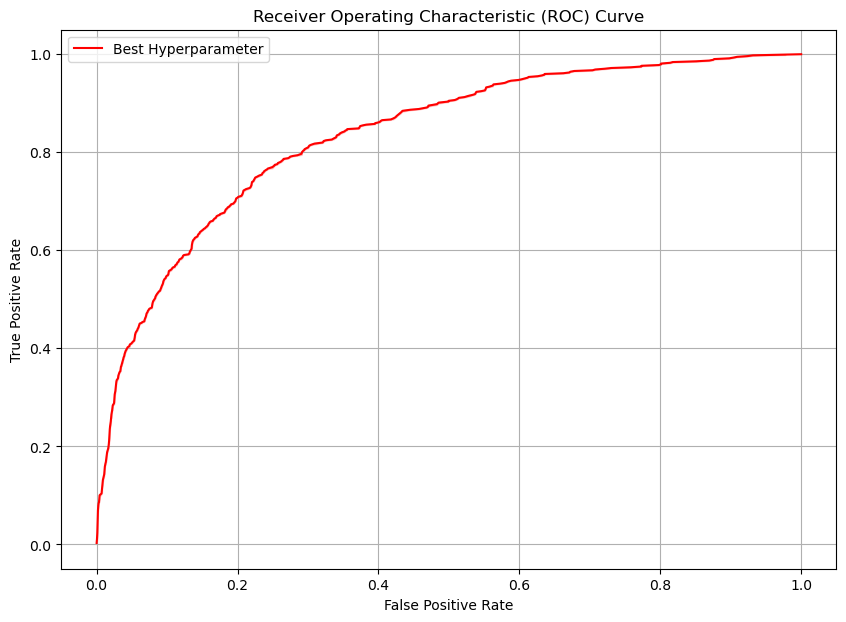

In [29]:

# Create a figure for plotting
plt.figure(figsize=(10, 7))

# Plotting the ROC curve for the best model in red
sns.lineplot(x=fpr_best, y=tpr_best, label='Best Hyperparameter', color='red')

# Adding labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid(True)  # Add grid for better readability

# Show the plot
plt.show()

In [30]:
auc_default = auc(fpr_default, tpr_default)
auc_best = auc(fpr_best, tpr_best)

print(auc_default)
print(auc_best)

0.833646495348623
0.8342685683111215


## Deep Dive: Feature Selection Using SelectKBest

In [32]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

# Note that k=5 is specifying that we want the top 5 features
selector = SelectKBest(f_classif, k=5)
selector.fit(X, y)
filter = selector.get_support()
top_5_features = X.columns[filter]

print("Best 5 features:")
print(top_5_features)

# Create new training and test data for features
new_X_train = X_train[top_5_features]
new_X_test = X_test[top_5_features]


# Initialize a LogisticRegression model object with the best value of hyperparameter C 
# The model object should be named 'model'
# Note: Supply max_iter=1000 as an argument when creating the model object
model = LogisticRegression(C=best_C, max_iter=1000)
# Fit the model to the new training data
model.fit(new_X_train, y_train)

# Use the predict_proba() method to use your model to make predictions on the new test data 
# Save the values of the second column to a list called 'proba_predictions'
proba_predictions = model.predict_proba(new_X_test)[:, 1]

# Compute the auc-roc
fpr, tpr, thresholds = roc_curve(y_test, proba_predictions)
auc_result = auc(fpr, tpr)
print(auc_result)


Best 5 features:
Index(['host_response_rate', 'number_of_reviews', 'number_of_reviews_ltm',
       'number_of_reviews_l30d', 'review_scores_cleanliness'],
      dtype='object')
0.8120429216173898


When experimenting with the number of features selected by SelectKBest, changing the value of k significantly impacts the AUC value, indicating how model performance can vary with different subsets of features. In the initial setup with k=5, the AUC achieved was approximately 0.793, which is respectable and suggests that the model, even with a reduced set of features, effectively discriminates between classes.
Finding a more effective subset of features that maximize the model's performance may result from changing the value of k. To improve the AUC, one possible solution would be to increase k to include more features, which could help capture more relationships and complexity in the data. On the other hand, decreasing k may cause performance to suffer if important details are missed, but it may also make the most significant features stand out. By experimenting with various values of k, it is possible to find the ideal number of features that balances predictive power and model simplicity and yields the highest AUC.

## Part 9. Make Your Model Persistent

In [35]:
import pickle

In [36]:

model_filename = 'optimized_logistic_regression_model.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(model_best, file)

print(f"Model saved to {model_filename}")

Model saved to optimized_logistic_regression_model.pkl


In [37]:

# Load the model from the file
with open('optimized_logistic_regression_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Use the loaded model to make predictions on X_test
predictions = loaded_model.predict(X_test)

print("Sample predictions:", predictions[:10])

Sample predictions: [ True False  True False False False False False False False]
